In [10]:
import numpy as np
import matplotlib.pyplot as plt

pt = 4/3
halfsize = (3, 3/1.618)
fullsize = (5, 5/1.618)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [142]:
def potq(x, a=10):
    return a/2*x**2

def step(x,pot,dx=0.01):
    dx = np.random.choice([-1,1],len(x))*dx
    return x + (np.random.random(len(x))<np.exp(-pot(x+dx)+pot(x)))*dx

def do_sim(num_steps,num_traj,pot ,xinit=0):
    x = np.ones((num_steps,num_traj))*xinit
    for i in range(1,num_steps):
        x[i] = step(x[i-1],pot)
    return x

def plot_sim(x):
    msd = np.average(x**2,axis=1)
    hist,bins = np.histogram(x,bins=50,density=True)
    fig,ax = plt.subplots(3,1)
    for j in range(0,x.shape[1]):
        ax[0].plot(x[:,j])
    ax[1].plot(msd)
    ax[2].plot(bins[:-1],hist)

In [143]:
x = do_sim(10000,50,potq)

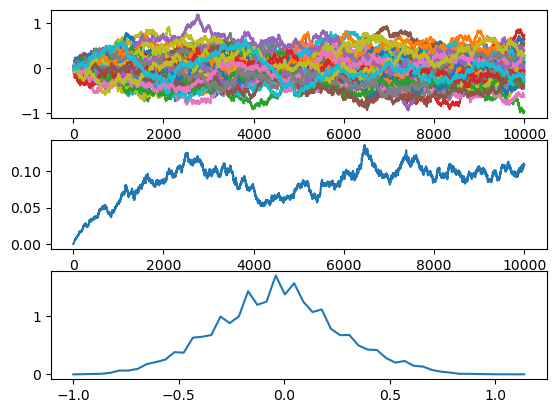

In [144]:
plot_sim(x)

# Histogram

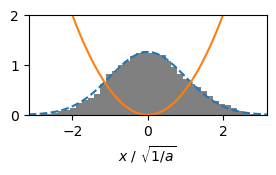

In [163]:
def normal(x, a=10): return 1/(np.sqrt(1/a) * np.sqrt(2 * np.pi)) * np.exp( - x**2 / (2 * np.sqrt(1/a)**2) )

def plot_hist(x, range=1, step=0.05, scale=np.sqrt(1/10)):
	hist, bins = np.histogram(x.ravel(), density=True, bins=np.arange(-range, range+step, step))
	plt.bar(bins[1:]/scale, hist, align="edge", width=2*range/len(hist)/scale, color="gray")
	# plt.plot([0,0,1,1], [100,0,0,100], color=colors[1])
	x_list = np.linspace(-range, range, 100)

	plt.plot(x_list/scale, normal(x_list), color=colors[0], ls="dashed")
	plt.plot(x_list/scale, potq(x_list), color=colors[1])
	plt.xlim(-range/scale, range/scale)

plt.figure(figsize=halfsize)
plot_hist(x[5000:])
plt.ylim(0, 2)
plt.xlabel(r"$x$ / $\sqrt{1/a}$")
plt.tight_layout()
plt.savefig("../figures/03 histogram.pdf")
plt.show()

# 2D Hist

In [6]:
x = do_sim(1000,5000,potq)

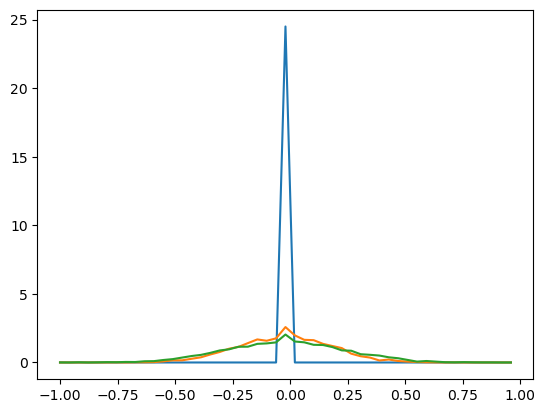

In [7]:
bins = np.linspace(-1, 1, 50)
times = range(x.shape[1])
extent=[
		0, x.shape[1], 
		bins[0], bins[-1]
	]

hist = np.array([np.histogram(i, bins, density=True)[0] for i in x])

plt.plot(bins[:-1], hist[1])
plt.plot(bins[:-1], hist[len(hist)//2])
plt.plot(bins[:-1], hist[-1])
plt.show()

/tmp/ipykernel_1235104/3579316942.py:2: RuntimeWarning: divide by zero encountered in log
  log_hist = np.log(hist)


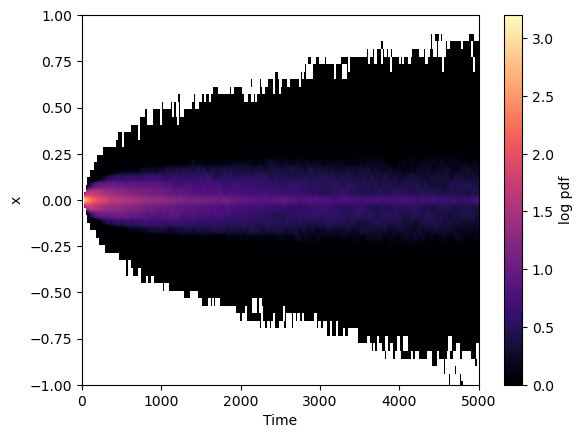

In [8]:
log_hist = hist
log_hist = np.log(hist)

plt.imshow(
	log_hist.T,
	aspect="auto",
	origin="lower",
	extent=extent,
	vmin=0,
	cmap="magma"
)
plt.colorbar(label="log pdf")

# plt.contour(log_hist.T, 10,
# 	extent=extent,
# 	color="white",
# )

plt.xlabel("Time")
plt.ylabel("x")
plt.show()

In [165]:
import numpy as np

def reduce_dimension_by_sum(arr, n, axis=0):
    """
    Reduces the length of one dimension of a 2D numpy array by summing every `n` neighboring elements.
    
    Parameters:
        arr (np.ndarray): Input 2D array.
        n (int): Number of neighboring elements to sum.
        axis (int): The axis to reduce (0 for rows, 1 for columns).
    
    Returns:
        np.ndarray: Reduced 2D array.
    """
    if axis == 0:
        new_shape = (arr.shape[0] // n, n, arr.shape[1])
    elif axis == 1:
        new_shape = (arr.shape[0], arr.shape[1] // n, n)
    else:
        raise ValueError("Axis must be 0 (rows) or 1 (columns)")

    trimmed_size = (arr.shape[axis] // n) * n  # Ensure divisibility
    if axis == 0:
        arr = arr[:trimmed_size, :]
    else:
        arr = arr[:, :trimmed_size]

    reshaped = arr.reshape(new_shape)
    return reshaped.sum(axis=1 if axis == 0 else 2)

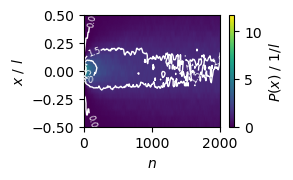

CPU times: user 485 ms, sys: 5.92 ms, total: 491 ms
Wall time: 491 ms


In [220]:
%%time
x = do_sim(2000,2000,potq, xinit=0)

bins = np.arange(-0.5, 0.5+0.05, 0.05)
times = range(x.shape[1])
hist = np.array([np.histogram(i, bins, density=True)[0] for i in x])
hist = reduce_dimension_by_sum(hist, 10)/10


plt.figure(figsize=halfsize)
plt.imshow(
	hist.T,
	aspect="auto",
	origin="lower",
	extent=[
		0, x.shape[0], 
		bins.min(), bins.max()
	],
	# cmap="magma",
	vmin=0,
	# norm=mpl.colors.LogNorm()
)
plt.colorbar(label=r"$P(x)$ / $1/l$")

c = plt.contour(
	hist.T,
	extent=[
		0, x.shape[0], 
		bins.min(), bins.max()
	],
	colors="white",
	linewidths=1
)
plt.clabel(c, inline=True, fontsize=6)

plt.xlabel(r"$n$")
plt.ylabel(r"$x$ / $l$")

plt.tight_layout()
plt.savefig("../figures/03 histogram evolution.pdf")
plt.show()

In [190]:
import matplotlib as mpl